# Analyzing students performance

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Reading dataset

file = 'students.csv'
base = pd.read_csv(file)

In [3]:
base.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Verifying if there is any missing values

base.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
base.rename(columns = {'race/ethnicity': 'race', 'parental level of education': 'parents_level_education', 'test preparation course': 'course', 'math score': 'math', 'reading score': 'reading', 'writing score': 'writing'}, inplace = True)

In [6]:
base.head()

,gender,race,parents_level_education,lunch,course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
#Creating new variables

base['total_score'] = base['math'] + base['reading'] + base['writing']

In [8]:
base['mean_score'] = base['total_score'] / 3

In [9]:
base.head()

,gender,race,parents_level_education,lunch,course,math,reading,writing,total_score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Text(0, 0.5, 'QUANTITY')

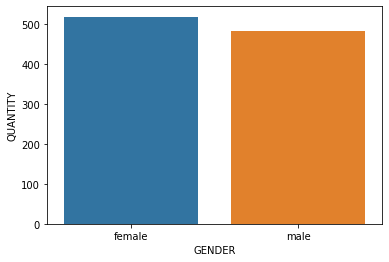

In [10]:
sns.countplot(base.gender)
plt.xlabel('GENDER')
plt.ylabel('QUANTITY')

We have more women than men in the dataset.

In [11]:
mean_score_female = base[(base.gender == 'female')]
mean_score_male = base[(base.gender == 'male')]

Text(0, 0.5, 'MEAN')

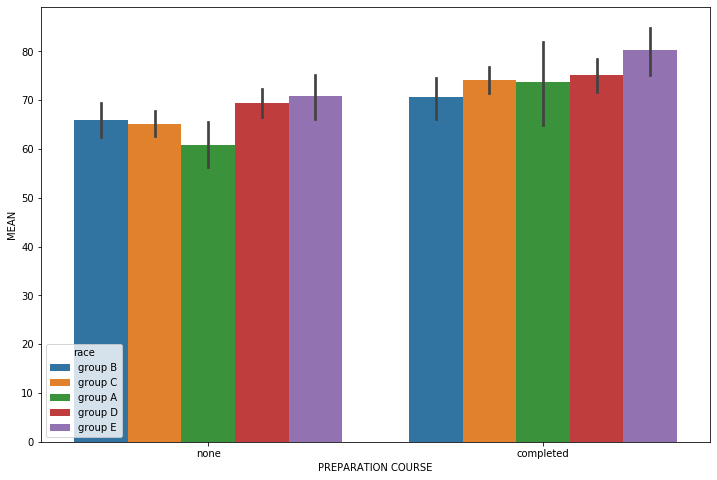

In [12]:
plt.figure(figsize = (12,8))
sns.barplot(x = mean_score_female.course, y= mean_score_female.mean_score, hue = mean_score_female.race)
plt.xlabel('PREPARATION COURSE')
plt.ylabel('MEAN')


Based on this graph when we evaluate only women, we can see that the mean score between all the groups is better for the ones who completed the preparation course. Also, Group E has the highest mean. 

Text(0, 0.5, 'MEAN')

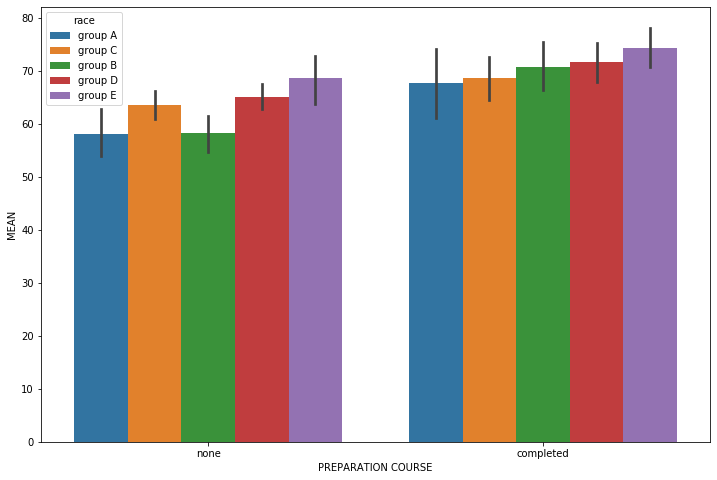

In [13]:
plt.figure(figsize = (12,8))
sns.barplot(x = mean_score_male.course, y= mean_score_male.mean_score, hue = mean_score_male.race)
plt.xlabel('PREPARATION COURSE')
plt.ylabel('MEAN')


Based on this graph when we evaluate only men, we can see that the mean score for the Group E who didnt complete the course is higher than the group A who completed the course. This is one difference between male and female. Also here Group E has the highest mean. 

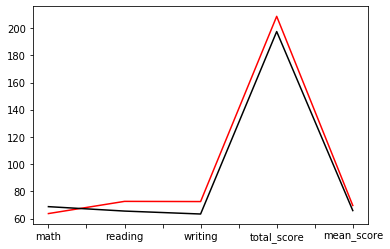

In [14]:
base[(base.gender == 'female')].mean().plot(color = 'red')
base[(base.gender == 'male')].mean().plot(color = 'black')

Analyzing this graph, we can see that men have the highest average in mathematics. Women have a better average than men in the rest and also the total average.

,math,reading,writing,total_score,mean_score
count,518.000000,518.000000,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181,208.708494,69.569498
std,15.491453,14.378245,14.844842,43.625427,14.541809
min,0.000000,17.000000,10.000000,27.000000,9.000000
25%,54.000000,63.250000,64.000000,182.000000,60.666667
50%,65.000000,73.000000,74.000000,211.000000,70.333333
75%,74.000000,83.000000,82.000000,236.000000,78.666667
max,100.000000,100.000000,100.000000,300.000000,100.000000


<Figure size 864x576 with 0 Axes>

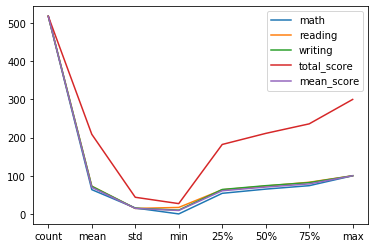

In [15]:
plt.figure(figsize = (12,8))
mean_score_female.describe().plot()
mean_score_female.describe()

,math,reading,writing,total_score,mean_score
count,482.000000,482.000000,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203,197.512448,65.837483
std,14.356277,13.931832,14.113832,41.096520,13.698840
min,27.000000,23.000000,15.000000,69.000000,23.000000
25%,59.000000,56.000000,53.000000,168.000000,56.000000
50%,69.000000,66.000000,64.000000,199.000000,66.333333
75%,79.000000,75.000000,73.750000,228.750000,76.250000
max,100.000000,100.000000,100.000000,300.000000,100.000000


<Figure size 864x576 with 0 Axes>

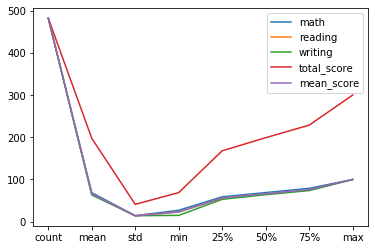

In [16]:
plt.figure(figsize = (12,8))
mean_score_male.describe().plot()
mean_score_male.describe()

Text(0, 0.5, 'QUANTITY')

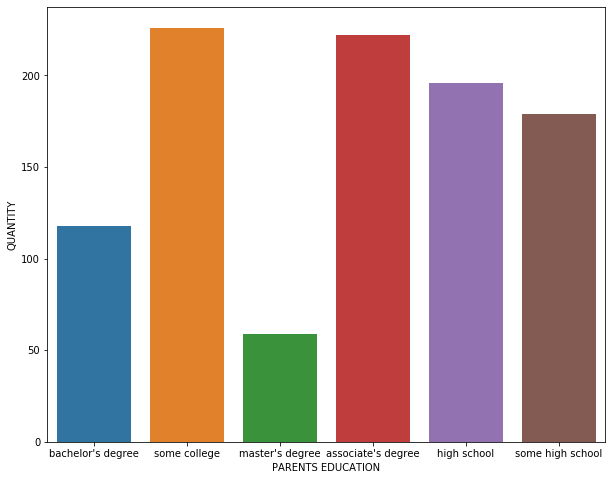

In [17]:
plt.figure(figsize = (10,8))
sns.countplot(base.parents_level_education)
base.parents_level_education.value_counts()
plt.xlabel('PARENTS EDUCATION')
plt.ylabel('QUANTITY')


In [18]:
parents_masters = base[(base.parents_level_education == "master's degree")]
parents_bach = base[(base.parents_level_education == "bachelor's degree")]
parents_some_college = base[(base.parents_level_education == "some college")]
parents_associate = base[(base.parents_level_education == "associate's degree")]
parents_high_school = base[(base.parents_level_education == "high school")]
parents_some_high_school = base[(base.parents_level_education == "some high school")]

,math,reading,writing,total_score,mean_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,69.745763,75.372881,75.677966,220.796610,73.598870
std,15.153915,13.775163,13.730711,40.803051,13.601017
min,40.000000,42.000000,46.000000,134.000000,44.666667
25%,55.500000,65.500000,67.000000,189.500000,63.166667
50%,73.000000,76.000000,75.000000,220.000000,73.333333
75%,81.000000,84.500000,85.000000,256.500000,85.500000
max,95.000000,100.000000,100.000000,293.000000,97.666667


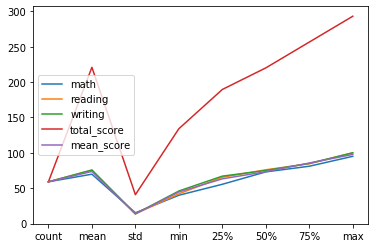

In [19]:
parents_masters.describe().plot()
parents_masters.describe()

,math,reading,writing,total_score,mean_score
count,118.000000,118.00000,118.000000,118.000000,118.000000
mean,69.389831,73.00000,73.381356,215.771186,71.923729
std,14.943789,14.28525,14.728262,41.839827,13.946609
min,29.000000,41.00000,38.000000,117.000000,39.000000
25%,61.000000,63.00000,62.500000,192.250000,64.083333
50%,68.000000,73.00000,74.000000,213.500000,71.166667
75%,79.000000,82.75000,83.000000,242.000000,80.666667
max,100.000000,100.00000,100.000000,300.000000,100.000000


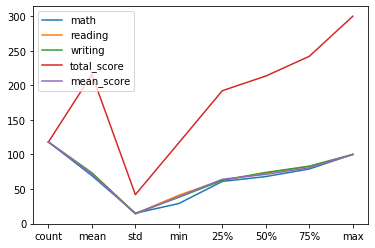

In [20]:
parents_bach.describe().plot()
parents_bach.describe()

,math,reading,writing,total_score,mean_score
count,226.000000,226.000000,226.000000,226.000000,226.000000
mean,67.128319,69.460177,68.840708,205.429204,68.476401
std,14.312897,14.057049,15.012331,41.132921,13.710974
min,19.000000,23.000000,19.000000,70.000000,23.333333
25%,59.000000,60.000000,60.000000,180.000000,60.000000
50%,67.500000,70.500000,70.000000,206.000000,68.666667
75%,76.000000,79.750000,79.000000,234.000000,78.000000
max,100.000000,100.000000,99.000000,297.000000,99.000000


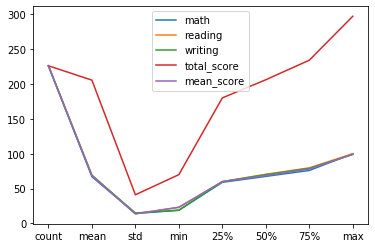

In [21]:
parents_some_college.describe().plot()
parents_some_college.describe()

,math,reading,writing,total_score,mean_score
count,222.000000,222.000000,222.000000,222.000000,222.000000
mean,67.882883,70.927928,69.896396,208.707207,69.569069
std,15.112093,13.868948,14.311122,41.012743,13.670914
min,26.000000,31.000000,35.000000,95.000000,31.666667
25%,57.000000,61.000000,58.000000,176.000000,58.666667
50%,67.000000,72.500000,70.500000,209.000000,69.666667
75%,80.000000,81.000000,80.000000,237.000000,79.000000
max,100.000000,100.000000,100.000000,300.000000,100.000000


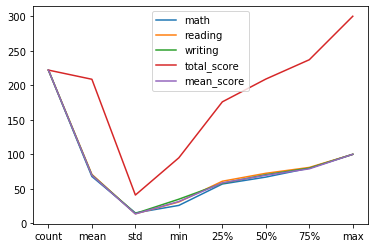

In [22]:
parents_associate.describe().plot()
parents_associate.describe()

,math,reading,writing,total_score,mean_score
count,196.000000,196.000000,196.000000,196.000000,196.000000
mean,62.137755,64.704082,62.448980,189.290816,63.096939
std,14.539651,14.132130,14.085907,40.531749,13.510583
min,8.000000,24.000000,15.000000,55.000000,18.333333
25%,53.750000,54.000000,52.000000,161.750000,53.916667
50%,63.000000,66.000000,64.000000,195.000000,65.000000
75%,72.000000,74.250000,73.000000,218.000000,72.666667
max,99.000000,99.000000,100.000000,287.000000,95.666667


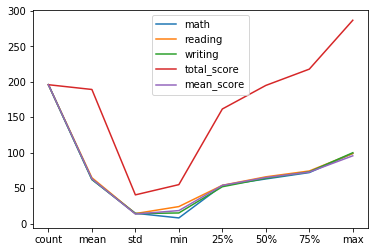

In [23]:
parents_high_school.describe().plot()
parents_high_school.describe()

,math,reading,writing,total_score,mean_score
count,179.000000,179.000000,179.000000,179.000000,179.000000
mean,63.497207,66.938547,64.888268,195.324022,65.108007
std,15.927989,15.479295,15.736197,44.952235,14.984078
min,0.000000,17.000000,10.000000,27.000000,9.000000
25%,53.000000,56.500000,54.000000,167.000000,55.666667
50%,65.000000,67.000000,66.000000,200.000000,66.666667
75%,74.000000,79.000000,77.000000,229.500000,76.500000
max,97.000000,100.000000,100.000000,297.000000,99.000000


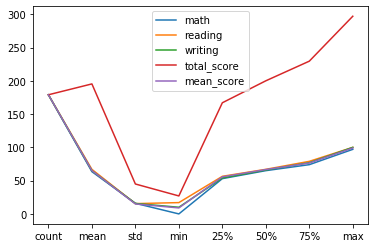

In [24]:
parents_some_high_school.describe().plot()
parents_some_high_school.describe()

Based on the graphs above, I can say that the parents' level of education influences the grade. Parents with masters have their children with the highest marks and their children also have the highest score, among the lowest grades. As for parents who have not finished high school, their children have the lowest average grade and the lowest minimum grade in the database. From this, we can conclude that the educational level has a positive impact on the children's grades.

In [25]:
base.corr()

,math,reading,writing,total_score,mean_score
math,1.000000,0.817580,0.802642,0.918746,0.918746
reading,0.817580,1.000000,0.954598,0.970331,0.970331
writing,0.802642,0.954598,1.000000,0.965667,0.965667
total_score,0.918746,0.970331,0.965667,1.000000,1.000000
mean_score,0.918746,0.970331,0.965667,1.000000,1.000000


Text(0, 0.5, 'TOTAL SCORE')

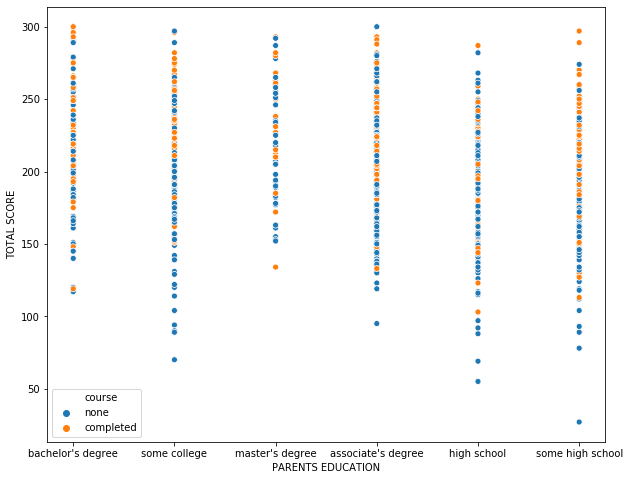

In [26]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = base.parents_level_education, y = base.total_score, hue = base.course)
plt.xlabel('PARENTS EDUCATION')
plt.ylabel('TOTAL SCORE')


We can see in the graph above that the preparation course has a positive impact for all students who complete. However, it can be seen that it has more impact on the total score for students whose parents have a low level of education than for students whose parents have the highest level of education. The worst grades are among students who have not completed the course, regardless of their parents' level of education, concluding the positive impact of the preparation course.

Text(0, 0.5, 'GRADES')

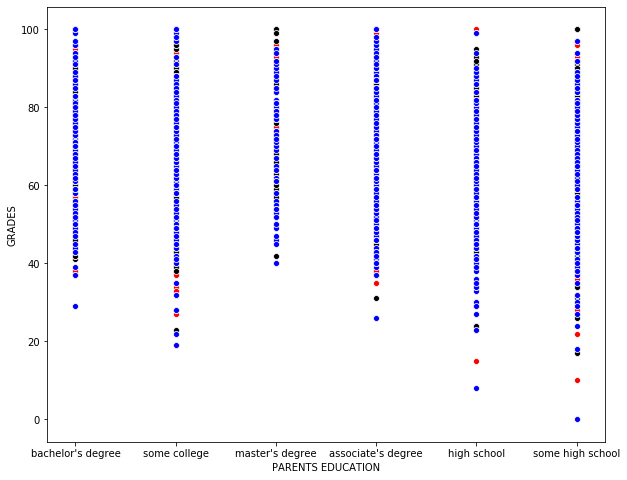

In [27]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = base.parents_level_education, y = base.writing, color = 'red')
sns.scatterplot(x = base.parents_level_education, y = base.reading, color = 'black')
sns.scatterplot(x = base.parents_level_education, y = base.math, color = 'blue')
plt.xlabel('PARENTS EDUCATION')
plt.ylabel('GRADES')


Through this graph, we see that the worst grades are always in mathematics, regardless of the parents' educational level.

I hope you guys liked it. Do not hesitate to make any suggestions!

Text(0, 0.5, 'TOTAL SCORE')

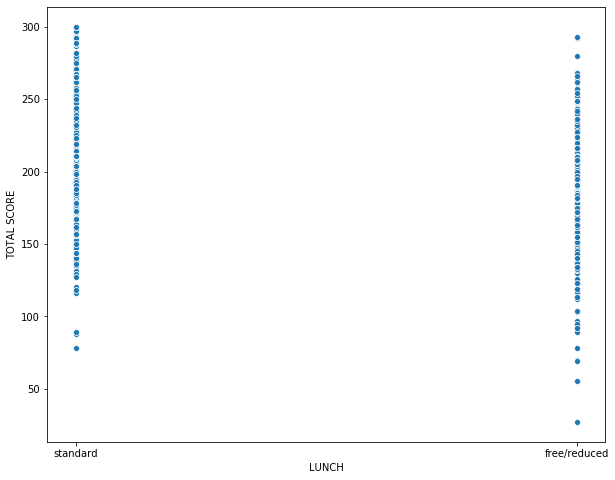

In [28]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = base.lunch, y = base.total_score)
plt.xlabel('LUNCH')
plt.ylabel('TOTAL SCORE')

Lunch also influences on the total score. As we can see, there are more students who have a grade lower than 130 with the free/reduced lunch type than students with the standard lunch. In addition, there are many more students with grades above 260 with standard lunch.

Now, I am gonna try to predict total score based on some attributes such as: gender, race, parents level of education, lunch, preparation course, writing, math and reading. 

In [29]:
base.drop('mean_score', axis = 1, inplace = True)

In [30]:
base.head()

,gender,race,parents_level_education,lunch,course,math,reading,writing,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [31]:
base['total_score'] = base['total_score'] /3
base.head()

,gender,race,parents_level_education,lunch,course,math,reading,writing,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [33]:
#Importing libraries

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [34]:
#Creating variables

X = base.iloc[:,0:8].values
Y = base.iloc[:,8].values

In [35]:
#LabelEncoder

label_encoder_X = LabelEncoder()
X[:, 0] = label_encoder_X.fit_transform(X[:, 0])
X[:, 1] = label_encoder_X.fit_transform(X[:, 1])
X[:, 2] = label_encoder_X.fit_transform(X[:, 2])
X[:, 3] = label_encoder_X.fit_transform(X[:, 3])
X[:, 4] = label_encoder_X.fit_transform(X[:, 4])

In [36]:
#Scaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
#Train and test

train_x,test_x,train_y,test_y = train_test_split(X, Y, test_size = 0.30)

In [38]:
#Decision Tree Regression

regressor = DecisionTreeRegressor()
regressor.fit(train_x, train_y)

score = regressor.score(train_x, train_y)

predicts = regressor.predict(test_x)
mae = mean_absolute_error(test_y, predicts)
print(score, mae)

1.0 1.0433333333333332


In [39]:
mae = mean_absolute_error(test_y, predicts)
print(mae)

1.0433333333333332


In [40]:
print(score)

1.0


In [41]:
#Random Forest Regressor

regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(train_x, train_y)

score = regressor.score(train_x, train_y)

predicts = regressor.predict(test_x)
mae = mean_absolute_error(test_y, predicts)

print(score, mae)

0.9989046058484801 0.7378888888888895


In [42]:
score

0.9989046058484801

In [43]:
mae = mean_absolute_error(test_y, predicts)
print(mae)

0.7378888888888895


In [44]:
#SVR

regressor = SVR(kernel = 'linear')
regressor.fit(train_x, train_y)

score = regressor.score(train_x, train_y)

predicts = regressor.predict(test_x)
mae = mean_absolute_error(test_y, predicts)

print(score, mae)

0.9999915717591097 0.03149605980912193
